## Example Code for Interval K-means

In [10]:
from interClusLib.IntervalData import IntervalData
from interClusLib.preprocessing import min_max_normalize
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [11]:
clustered_data = IntervalData.make_interval_blobs(n_clusters=3, n_dims=3, n_samples= 500)

clustered_data.summary()

Data Summary:
       Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
count       500.000000       500.000000       500.000000       500.000000   
mean          0.605999         2.130342         0.141594         1.864050   
std           5.468865         5.271579         7.343389         7.277014   
min          -8.442663        -6.712155       -13.127381       -11.102193   
25%          -5.035285        -3.534413        -9.015875        -7.445334   
50%           0.093242         2.097081         3.128604         5.695578   
75%           6.734351         7.714602         6.352814         7.520192   
max          10.268348        10.758806        10.087356        10.864865   

       Feature_3_lower  Feature_3_upper  
count       500.000000       500.000000  
mean          3.588975         5.315428  
std           2.300385         1.501440  
min          -1.848309         0.219413  
25%           1.504544         4.288819  
50%           4.152415         5.430712 

In [12]:
data = clustered_data.get_intervals()

data = min_max_normalize(data)

In [19]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='hedjazi', random_state=43)

kmeans.fit(data)

In [20]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.44995168 0.55390578]
  [0.84427147 0.88681437]
  [0.23344558 0.50770477]]

 [[0.14305581 0.22236723]
  [0.67809071 0.7818012 ]
  [0.55472626 0.6622734 ]]

 [[0.82469193 0.87958773]
  [0.13528932 0.20402795]
  [0.64102051 0.71383937]]]
[2 0 0 1 0 0 2 1 0 2 1 1 1 1 2 2 0 1 1 0 0 0 0 2 2 2 0 1 0 2 0 1 2 2 1 2 0
 2 0 1 2 2 1 1 2 2 0 2 0 0 0 1 2 1 1 2 2 1 0 2 2 2 0 1 0 1 1 1 0 1 1 2 0 0
 2 0 0 2 0 1 2 1 0 1 1 2 1 1 1 1 2 0 1 0 0 2 0 2 0 2 0 1 1 0 0 1 2 0 1 2 1
 2 2 1 2 0 0 2 0 1 0 2 1 1 2 0 2 2 1 2 2 2 1 0 2 1 1 2 1 1 0 2 2 0 2 1 0 1
 2 1 1 2 1 1 0 1 0 2 0 2 0 1 1 2 1 2 0 0 2 0 0 1 1 2 0 1 1 2 0 0 2 1 2 1 0
 0 1 0 0 2 1 1 1 0 1 1 0 2 2 0 1 1 0 1 2 0 2 0 2 1 2 2 0 0 2 1 0 0 1 0 0 2
 2 2 0 2 0 1 1 1 0 1 0 1 2 0 0 1 0 0 0 1 0 2 2 2 0 0 2 1 0 0 1 1 1 2 0 2 2
 2 2 0 1 0 1 2 0 2 2 0 2 2 2 1 1 1 2 1 0 1 2 2 1 0 0 0 0 1 0 1 0 0 0 0 2 1
 2 1 0 1 1 0 1 1 0 0 0 1 2 0 1 0 1 2 1 1 0 1 1 0 0 1 0 0 1 1 2 2 0 0 1 0 0
 0 0 1 1 0 2 2 0 0 2 0 0 2 0 2 1 1 0 2 0 2 0 0 2 1 2 2 2 1 2 0 2 2 0 1 0 1
 1 0 1 1 1

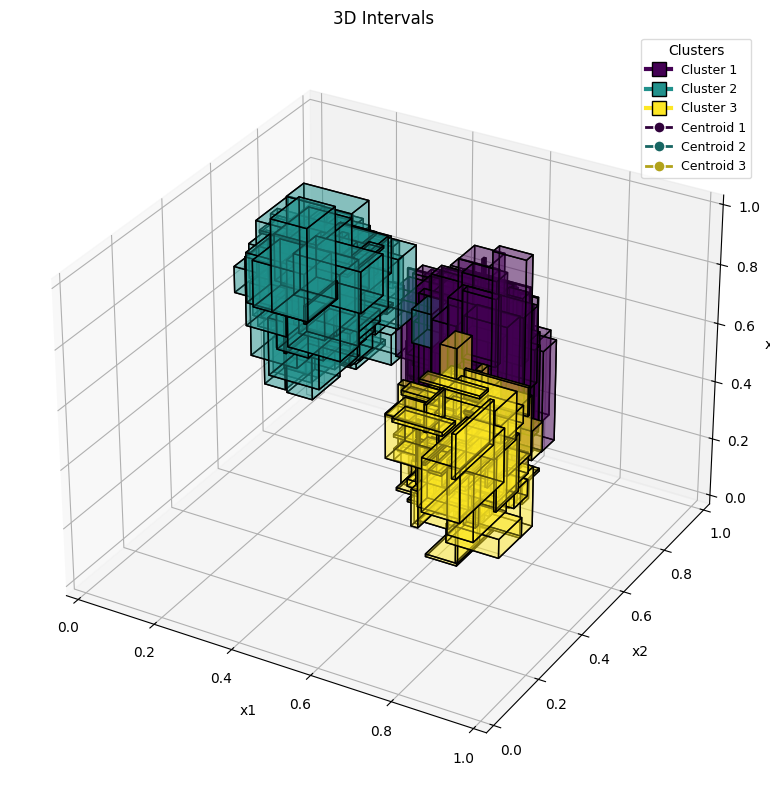

In [21]:
fig, ax = Interval3d.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

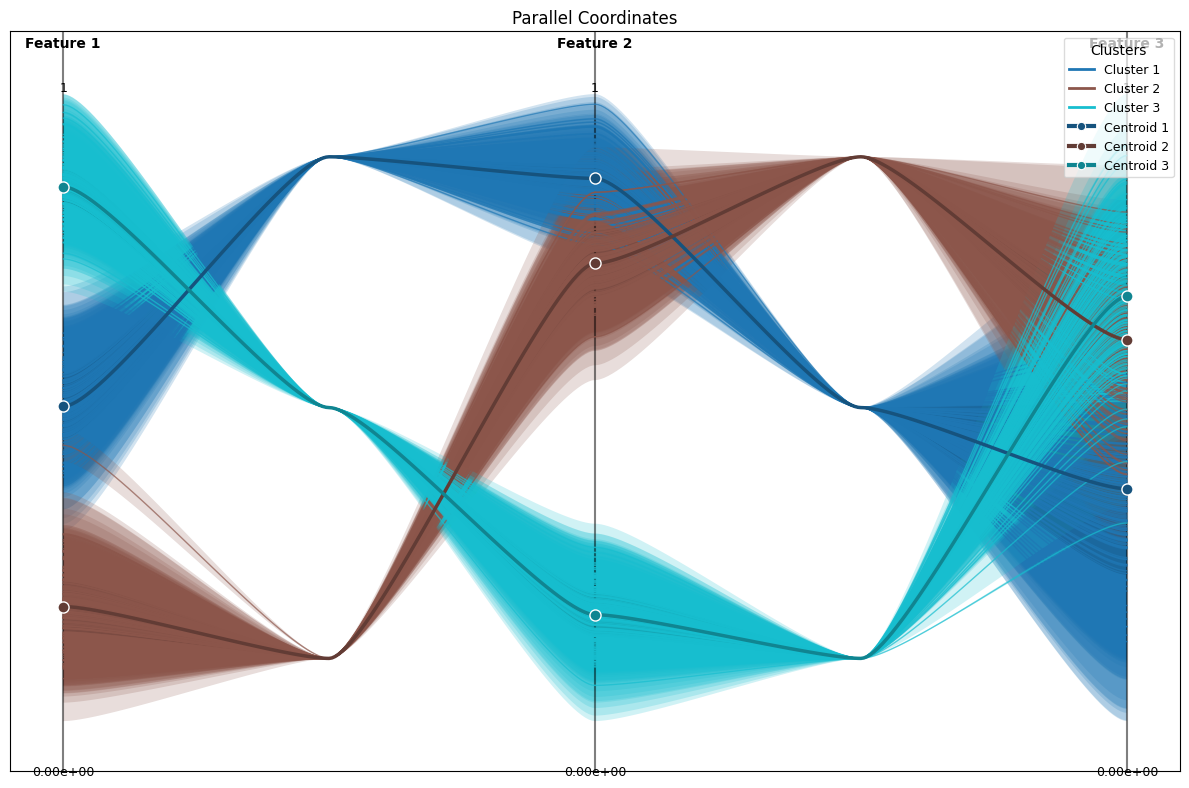

In [22]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=data, labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [17]:
metric_results = kmeans.compute_metrics_for_k_range(
    data,
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

Computing metrics for k=2...
Computing metrics for k=3...
Computing metrics for k=4...
Computing metrics for k=5...
Computing metrics for k=6...
Computing metrics for k=7...
Computing metrics for k=8...
Computing metrics for k=9...
Computing metrics for k=10...
{'distortion': {2: 0.7425382041004621, 3: 0.681558658475607, 4: 0.6497996873836274, 5: 0.5445961072837988, 6: 0.4554760139512178, 7: 0.4564830276150845, 8: 0.42317984286090254, 9: 0.4119876654445941, 10: 0.3975043031054465}, 'silhouette': {2: 0.09786948413272496, 3: 0.09739774009823435, 4: 0.07419819566323156, 5: 0.11075068801204148, 6: 0.11757771004909862, 7: 0.08446566063490436, 8: 0.07400342688491167, 9: 0.06511800287089722, 10: 0.06863648205422905}, 'davies_bouldin': {2: 1.7324816513870371, 3: 1.8541389996232216, 4: 1.823360471556792, 5: 1.7902274008354286, 6: 1.8997655679026122, 7: 2.0356347768594167, 8: 1.9985027510972349, 9: 2.178313323757164, 10: 2.3955444617984987}, 'calinski_harabasz': {2: 560.8496940224471, 3: 281.011

L Method optimal k: 5
Elbow Method optimal k: 6


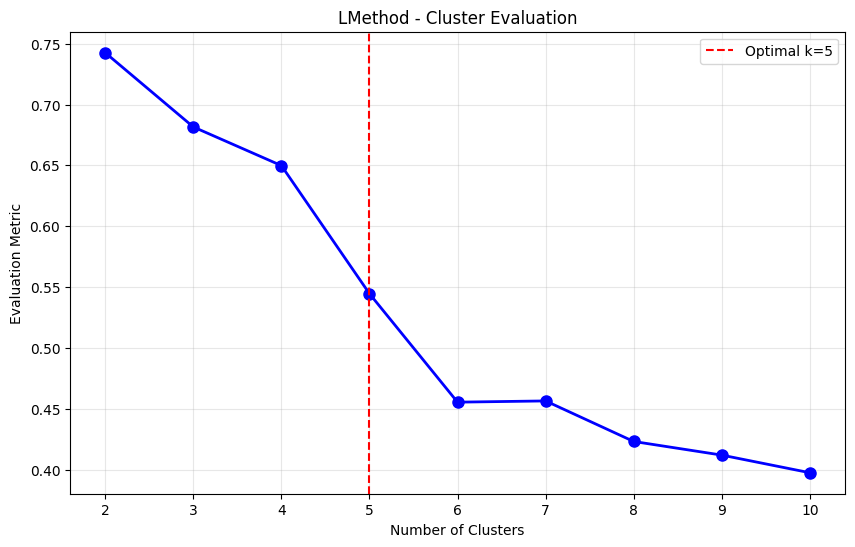

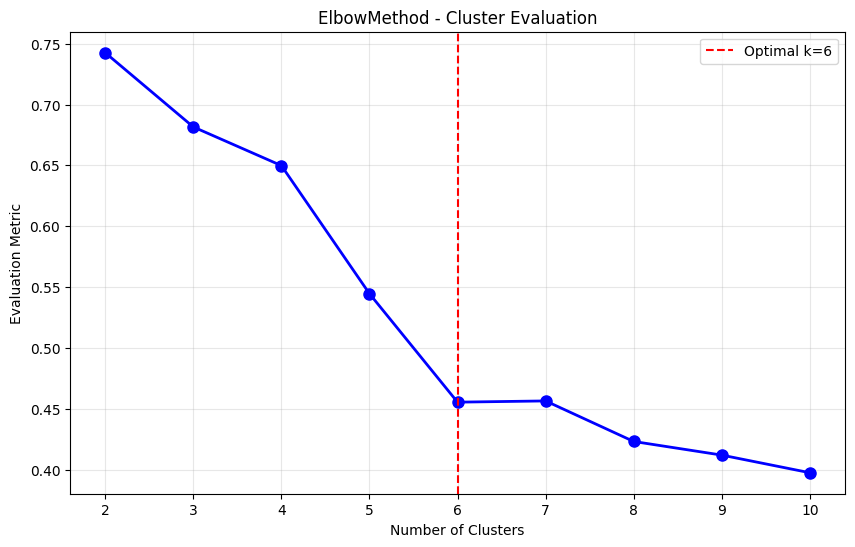

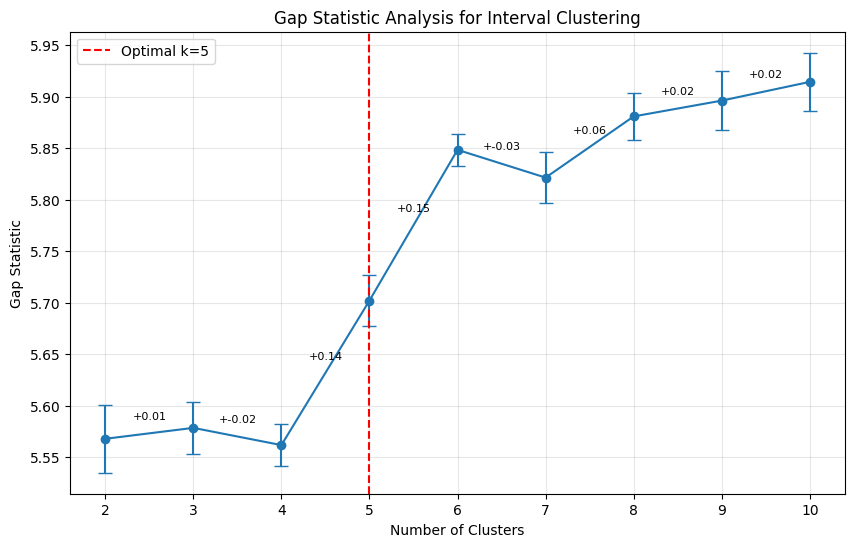

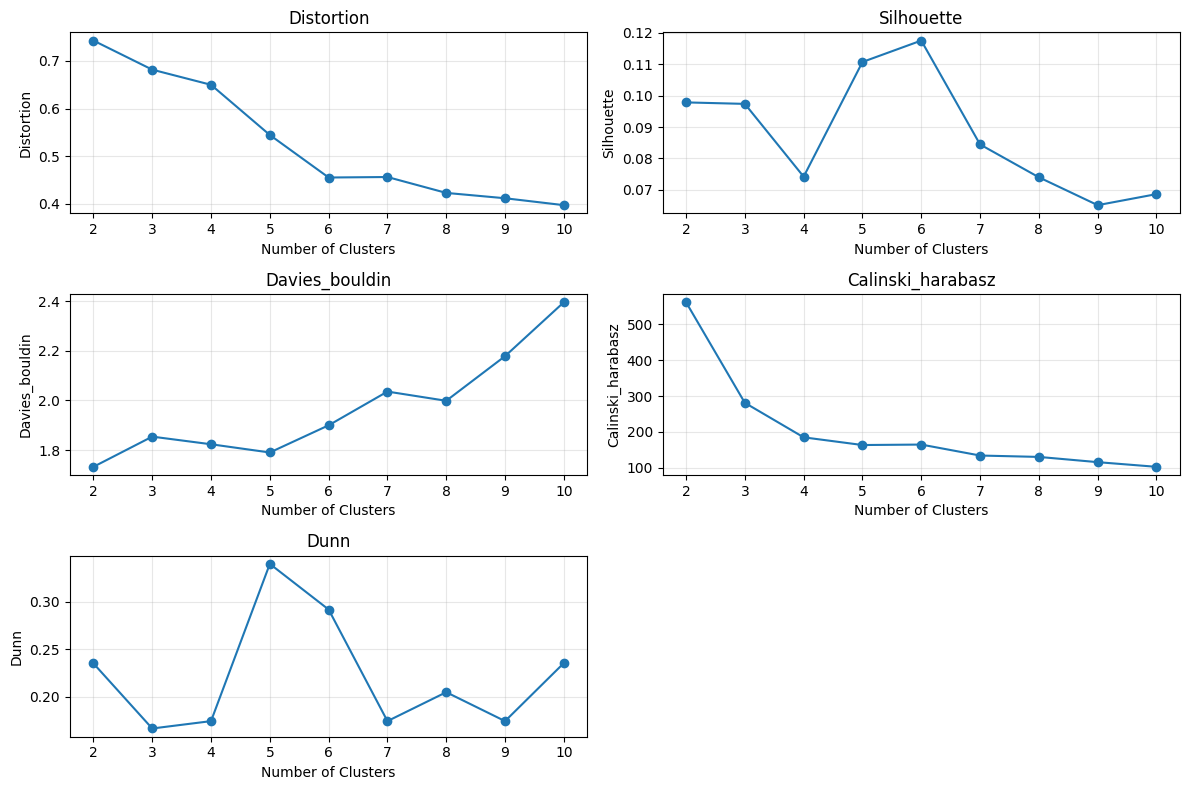

In [18]:
# 使用L方法确定最佳聚类数
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# 使用肘部法则确定最佳聚类数
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# 初始化 GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

# 使用 GapStatistic 确定最佳聚类数
optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# 可视化结果
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()